In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('loan_prediction.csv')

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [8]:
param_grid = {'max_depth': [8, 10, 15, 20],
              'max_leaf_nodes': [2, 5, 9, 15, 20],
              'max_features': [1, 2, 3, 5]}
n_iter_search=10

In [18]:
dt = DecisionTreeClassifier(random_state=9)
clf = RandomizedSearchCV(dt,param_grid,n_iter_search, cv = 5)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
acc = accuracy_score(y_test,y_predict)
print(acc, clf.best_params_)

0.7567567567567568 {'max_leaf_nodes': 2, 'max_features': 3, 'max_depth': 15}


C:\Users\emekanu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Observing variation between error and max depth
If we can observe what is actually happening as we increase the maximum depth( the length of the longest path from a root to a leaf) along with the variation in errors we can get to know of that how depth is having an effect over error.

In [23]:
depth_list = [8, 10, 15, 20, 50, 100, 120, 150, 175, 200]
acc_train = []
acc_test = []

In [24]:
for d in depth_list:
        clf = DecisionTreeClassifier(random_state = 9, max_depth = d)
        clf.fit(X_train, y_train)
        acc_train.append(accuracy_score(y_train, clf.predict(X_train)))
        acc_test.append(accuracy_score(y_test, clf.predict(X_test)))

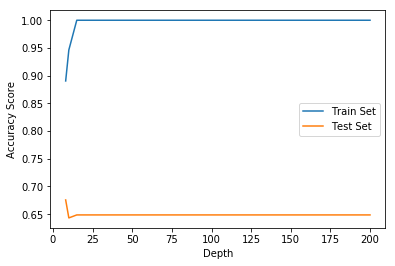

In [25]:
fig, ax = plt.subplots()
ax.plot(depth_list, acc_train, label = 'Train Set')
ax.plot(depth_list, acc_test, label = 'Test Set')
ax.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy Score')
plt.show()